# Text Mining in Wood Science Literature

### 1. Load data

In [1]:
from src.utils import *

In [2]:
# Set the path to the CSV file
csv_file_path = 'Your/Data/Path/Goes/Here.csv'

# Load the CSV file into a DataFrame (specify utf-8-sig encoding)
df0 = pd.read_csv(csv_file_path, encoding='utf-8-sig')

# Filter the DataFrame to include only records from a specific year (e.g., 2003 and later)
target_year = 2003
df = df0[df0['Year'] >= target_year]

# Filter to include only records from specific journals
specific_journals = ["Journal of Wood Science"]  # add journals here
df = df[df['Journal'].isin(specific_journals)]

# Check the dataset structure here
print(df.head()) 
print(df.shape)

                      Journal  Year  Volume Issue  \
4495  Journal of Wood Science  2023      69    39   
4496  Journal of Wood Science  2023      69    38   
4497  Journal of Wood Science  2023      69    37   
4498  Journal of Wood Science  2023      69    36   
4499  Journal of Wood Science  2023      69    35   

                                             DOI  \
4495  https://doi.org/10.1186/s10086-023-02111-3   
4496  https://doi.org/10.1186/s10086-023-02114-0   
4497  https://doi.org/10.1186/s10086-023-02112-2   
4498  https://doi.org/10.1186/s10086-023-02113-1   
4499  https://doi.org/10.1186/s10086-023-02109-x   

                                                Authors  \
4495  Fu-Chia Chen, Taichi Motoda, Ichiro Kamei, Yos...   
4496  Toshiyuki Fukui, Yoshiyuki Yanase, Yoshihisa F...   
4497      Hiroaki Horiyama, Keisuke Kojiro, Yuzo Furuta   
4498                          Ryutaro Sudo, Kenji Aoki    
4499  Sataporn Jantawee, Hyungsuk Lim, Minghao Li, J...   

             

### 2. Descriptive Analytics

2.1. Number of published papers

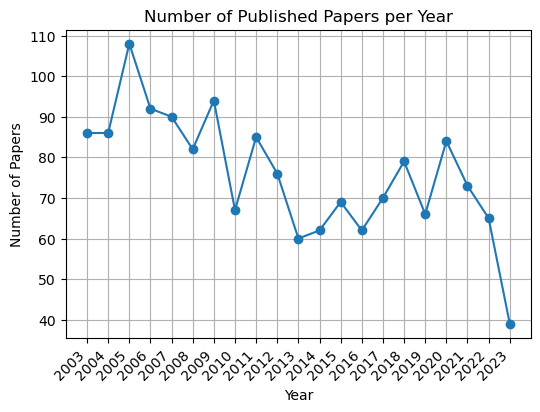

Year: 2003, Published Papers: 86, Total Papers: 86
Year: 2004, Published Papers: 86, Total Papers: 86
Year: 2005, Published Papers: 108, Total Papers: 108
Year: 2006, Published Papers: 92, Total Papers: 92
Year: 2007, Published Papers: 90, Total Papers: 90
Year: 2008, Published Papers: 82, Total Papers: 82
Year: 2009, Published Papers: 94, Total Papers: 94
Year: 2010, Published Papers: 67, Total Papers: 67
Year: 2011, Published Papers: 85, Total Papers: 85
Year: 2012, Published Papers: 76, Total Papers: 76
Year: 2013, Published Papers: 60, Total Papers: 60
Year: 2014, Published Papers: 62, Total Papers: 62
Year: 2015, Published Papers: 69, Total Papers: 69
Year: 2016, Published Papers: 62, Total Papers: 62
Year: 2017, Published Papers: 70, Total Papers: 70
Year: 2018, Published Papers: 79, Total Papers: 79
Year: 2019, Published Papers: 66, Total Papers: 66
Year: 2020, Published Papers: 84, Total Papers: 84
Year: 2021, Published Papers: 73, Total Papers: 73
Year: 2022, Published Papers:

In [3]:
# Calculate the number of papers published each year
yearly_paper_count = df.groupby('Year')['Title'].count()

# Visualize the trend of the number of papers published per year
plt.figure(figsize=(6, 4))
plt.plot(yearly_paper_count.index, yearly_paper_count.values, marker='o')
plt.title('Number of Published Papers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(yearly_paper_count.index.astype(int), rotation=45, ha='right')
plt.grid(True)
plt.show()

# Print the number of published papers per year and the total number of papers
total_papers_sum = 0
for year, count in yearly_paper_count.items():
    total_papers = df[df['Year'] == year]['Title'].count()
    total_papers_sum += total_papers
    print(f"Year: {year}, Published Papers: {count}, Total Papers: {total_papers}")

# Print the total number of papers
print(f"\nTotal Papers Sum: {total_papers_sum}")

2.2. Country Contribution

Total Number of Countries: 58
List of Countries:
['Japan', 'China', 'Korea', 'Taiwan', 'Sweden', 'USA', 'Canada', 'Indonesia', 'France', 'Turkey', 'Finland', 'Germany', 'Malaysia', 'Portugal', 'Brazil', 'Poland', 'Australia', 'Thailand', 'Austria', 'New Zealand', 'Italy', 'Slovenia', 'Czech', 'Iran', 'Costa Rica', 'Bangladesh', 'UK', 'Norway', 'Swiss', 'Greece', 'Egypt', 'Vietnam', 'Russia', 'Slovakia', 'Algeria', 'Chile', 'Netherlands', 'Romania', 'Nepal', 'Mongolia', 'India', 'Mexico', 'Spain', 'Cameroon', 'South Africa', 'Lithuania', 'Saudi Arabia', 'Croatia', 'Sudan', 'Hungary', 'Tunisia', 'Philippines', 'Denmark', 'Palestine', 'Jordan', 'Benin', 'Belgium', 'Uruguay']


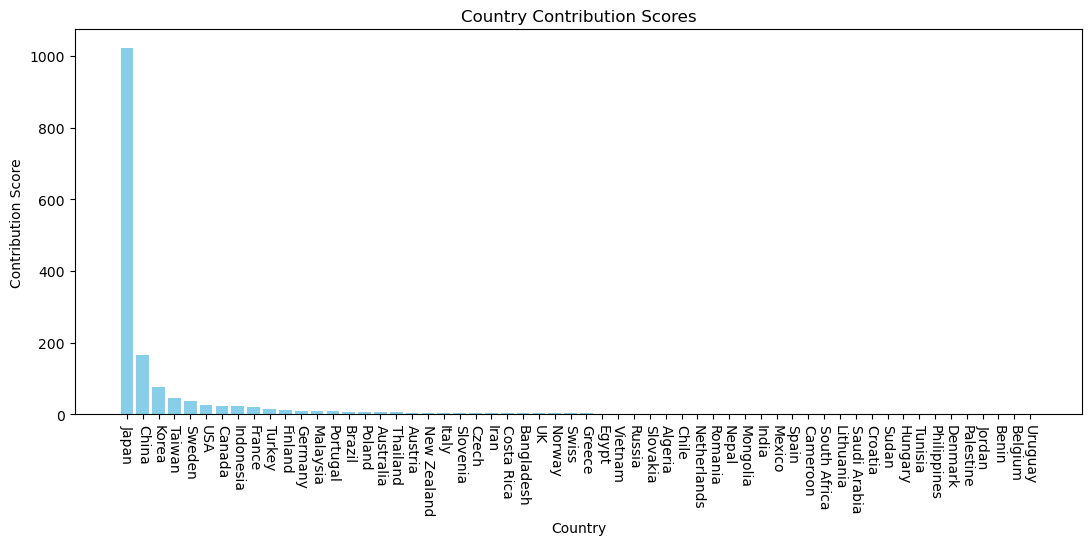

         Country  Contribution Score
0          Japan         1023.000000
1          China          165.666667
2          Korea           76.333333
3         Taiwan           46.833333
4         Sweden           36.833333
5            USA           25.866667
6         Canada           24.500000
7      Indonesia           22.700000
8         France           19.500000
9         Turkey           13.666667
10       Finland           11.500000
11       Germany            9.333333
12      Malaysia            8.700000
13      Portugal            8.000000
14        Brazil            6.500000
15        Poland            6.333333
16     Australia            6.000000
17      Thailand            5.866667
18       Austria            5.000000
19   New Zealand            4.666667
20         Italy            4.166667
21      Slovenia            4.000000
22         Czech            4.000000
23          Iran            4.000000
24    Costa Rica            3.500000
25    Bangladesh            3.333333
2

In [4]:
# Add a 'Contribution' column to the DataFrame
df['Contribution'] = df.apply(calculate_contribution, axis=1)

# Sum the contributions by country
total_contributions = {}
for contributions in df['Contribution']:
    for country, score in contributions.items():
        total_contributions[country] = total_contributions.get(country, 0) + score

# Sort contributions in descending order
sorted_contributions = dict(sorted(total_contributions.items(), key=lambda x: x[1], reverse=True))
countries = list(sorted_contributions.keys())
scores = list(sorted_contributions.values())

# Print total number of countries and list
total_countries = len(countries)
print(f"Total Number of Countries: {total_countries}")
print("List of Countries:")
print(countries)

# Plotting
plt.figure(figsize=(13, 5))
plt.bar(countries, scores, color='skyblue')
plt.title('Country Contribution Scores')
plt.xlabel('Country')
plt.ylabel('Contribution Score')
plt.xticks(rotation=270)
plt.show()

# Convert the results to a DataFrame
contributions_df = pd.DataFrame(list(sorted_contributions.items()), columns=['Country', 'Contribution Score'])

# Print the contributions DataFrame
print(contributions_df)

### 3. International Collaboration

3.1. International Collaborative Research Papers Count and Ratio

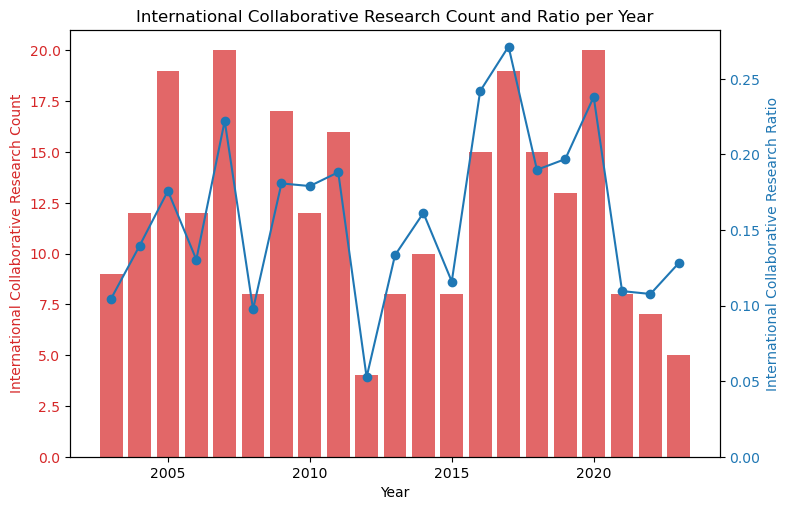

In [5]:
# Handle NaN values in the 'Country' column and convert to string
df['Country'] = df['Country'].fillna('').astype(str)

# Add a column indicating the type of research (International or Domestic)
df['Research_Type'] = df['Country'].apply(lambda x: 'International' if ',' in x else 'Domestic')

# Calculate the number of research papers by year and type
research_counts = df.groupby(['Year', 'Research_Type']).size().unstack().fillna(0)

# Calculate the ratio of international collaborative research papers
research_counts['International_Ratio'] = research_counts['International'] / (research_counts['Domestic'] + research_counts['International'])

# Plotting
plot_international_research(research_counts)

3.2. International Collaborative Research by Country Relationships

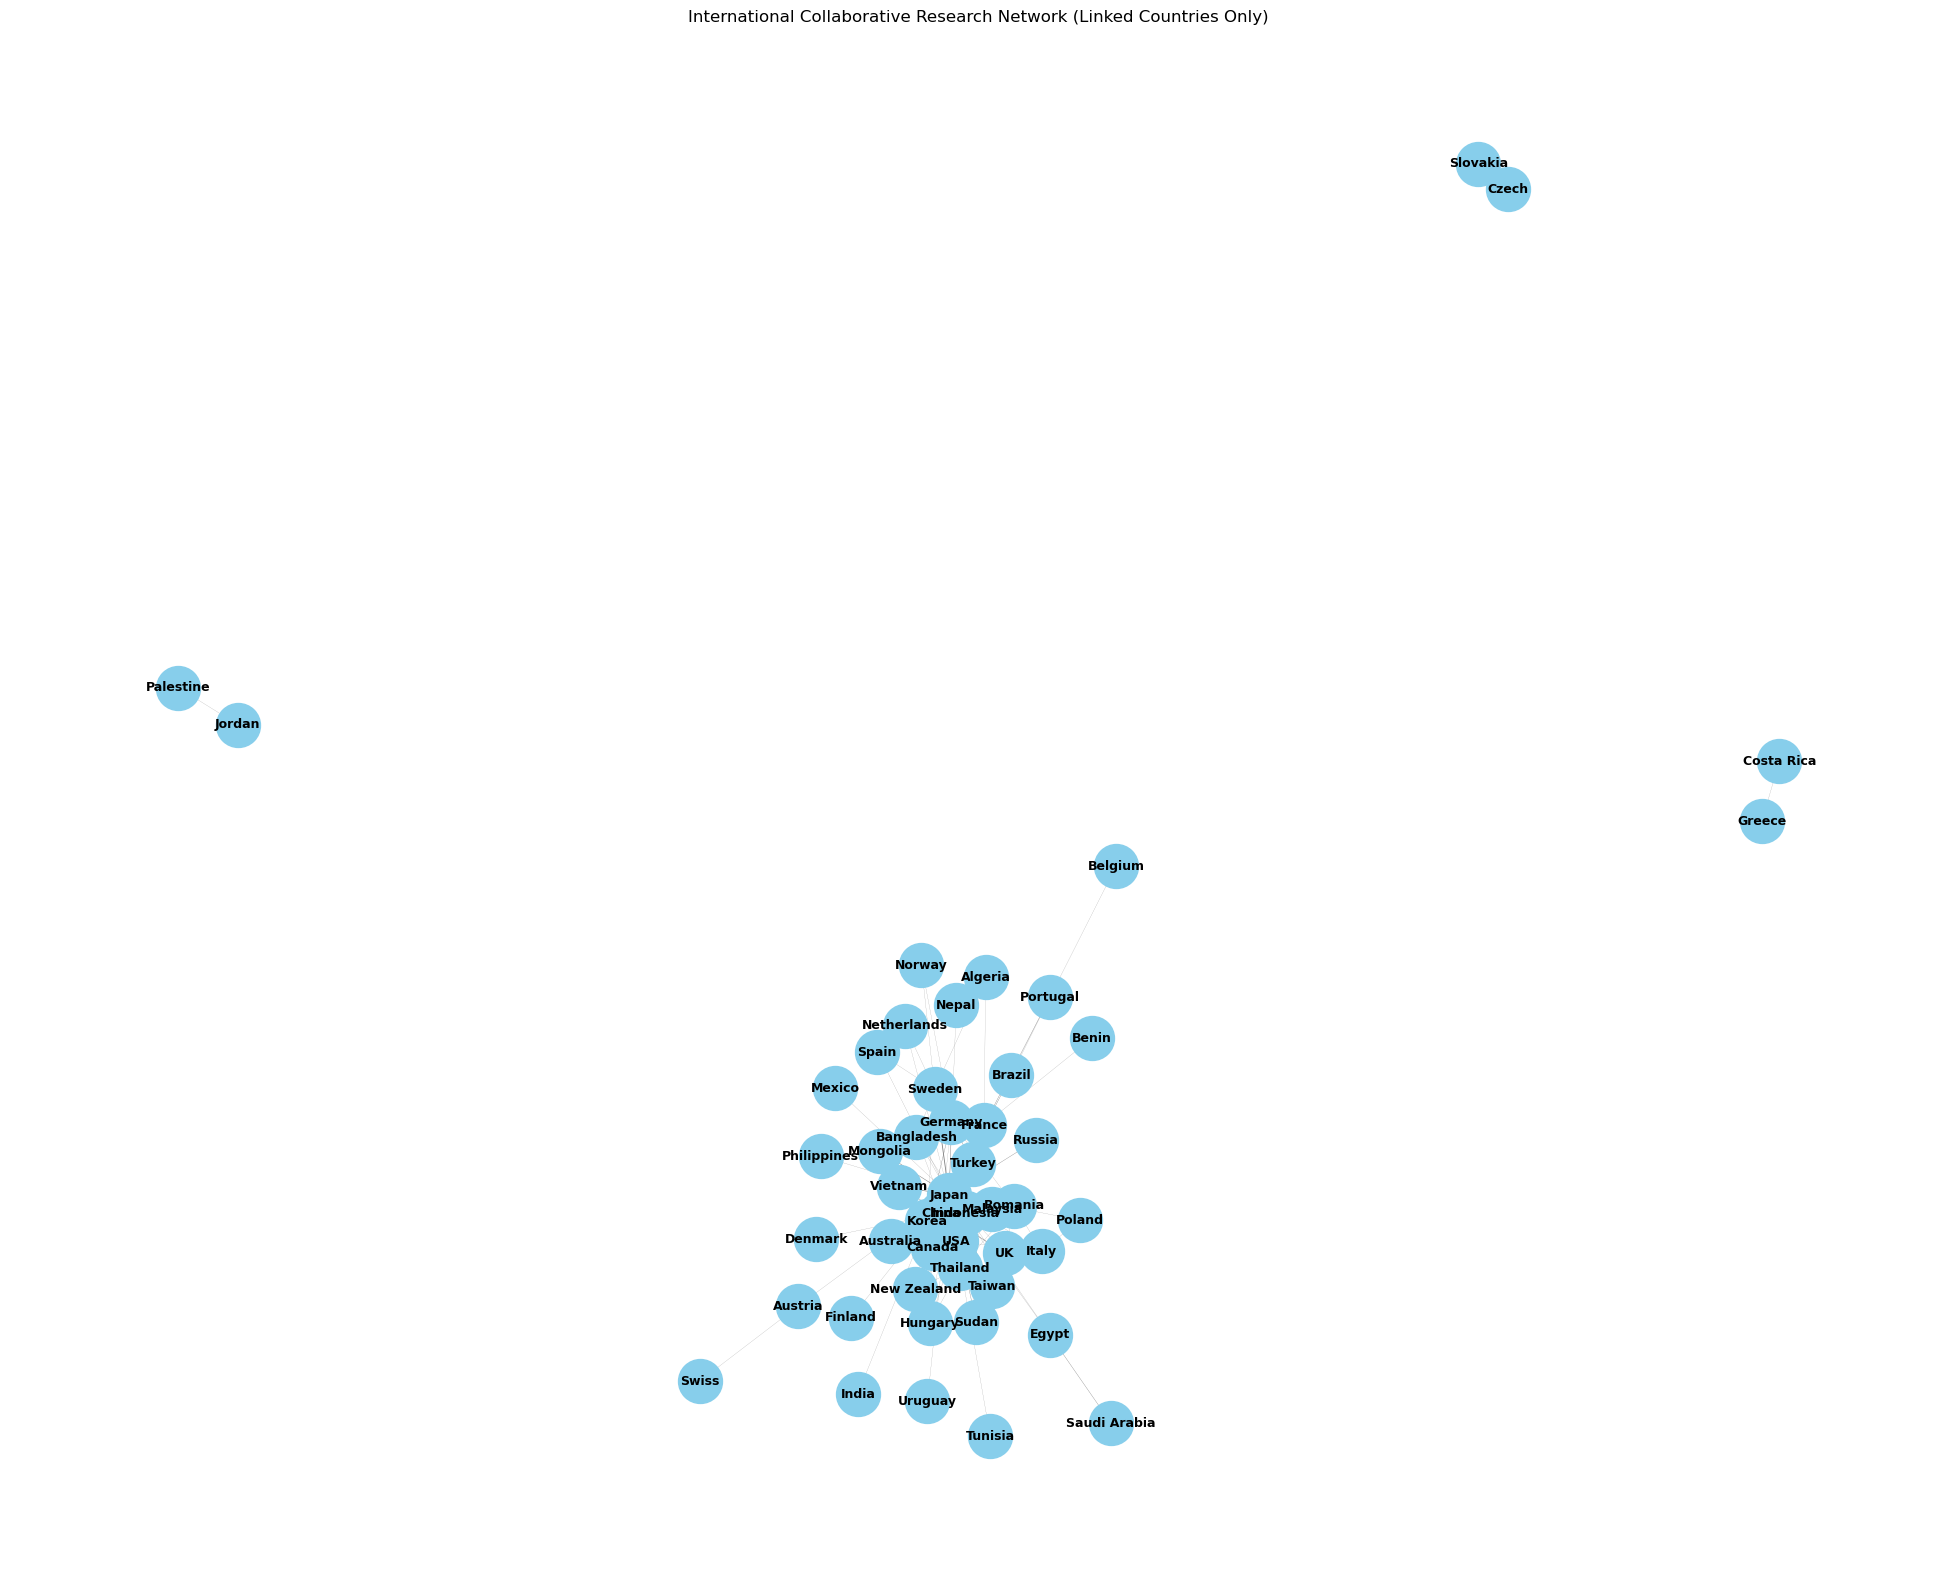

In [6]:
visualize_country_collaboration(df)

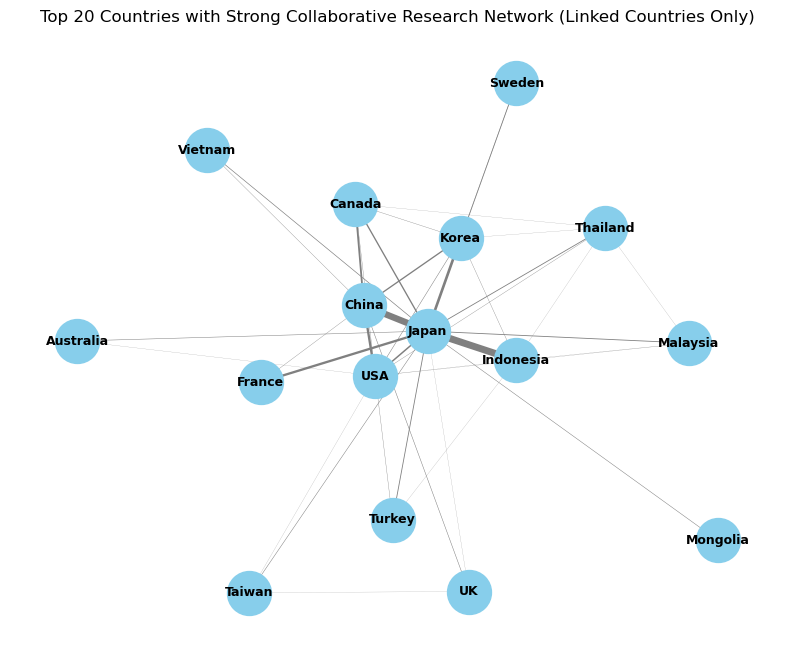

In [7]:
### Select Top N Countries for Collaborative Research Visualization
top_countries = 20  # Desired number of top countries

visualize_top_countries(df, top_countries)

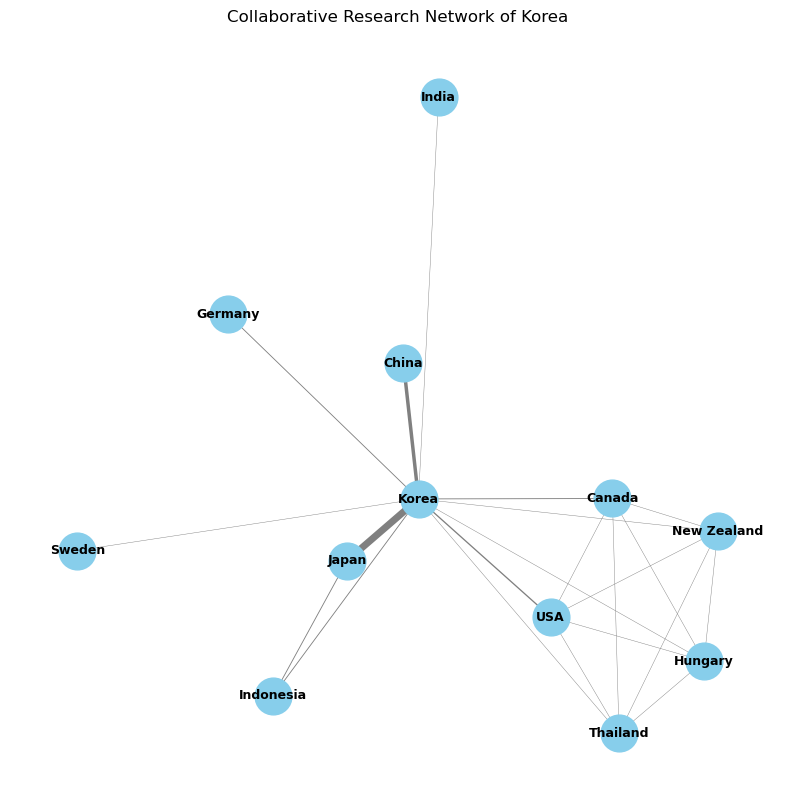

In [8]:
# Select a specific country for visualization
selected_country = 'Korea'
visualize_selected_country(df, selected_country)

3.3. Researcher relationship

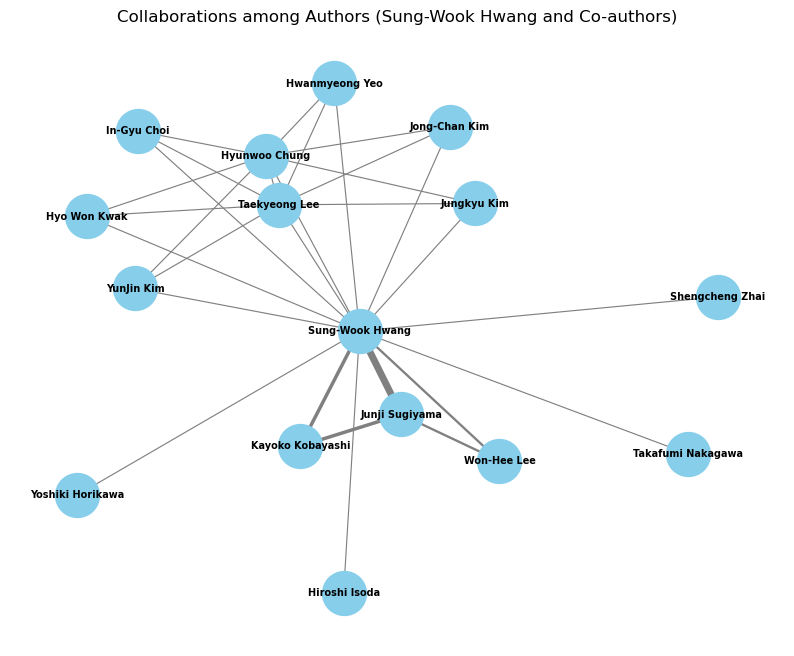

In [9]:
# Select a specific author
selected_author = 'Sung-Wook Hwang'
visualize_author_collaborations(df, selected_author)

### 4. Keyword Analysis

4.1. Keyword Frequency

In [10]:
# Handle NaN values in the 'Keywords' column and convert to string, then lower the case
df['Keywords'] = df['Keywords'].fillna('').astype(str).str.lower()

# Split each row's Keywords by comma and expand into rows
all_keywords_series = df['Keywords'].str.replace('?', '').str.split(', ')
# Flatten the list while filtering out 'null' values
all_keywords_list = [keyword for keywords in all_keywords_series.dropna() for keyword in keywords if keyword and keyword != 'null']

# Count the frequency of all mentioned keywords across all papers
keyword_counter = Counter(all_keywords_list)
all_keywords_dict = dict(keyword_counter.items())

# Convert the result to a DataFrame, sort it in descending order, and set the index name
all_keywords_df = pd.DataFrame(list(all_keywords_dict.items()), columns=['Keyword', 'Frequency'])
all_keywords_df = all_keywords_df.sort_values(by='Frequency', ascending=False)
all_keywords_df.index.name = 'All Keywords'

# Display the top 20 keywords in a table format
print(all_keywords_df.head(20))


                             Keyword  Frequency
All Keywords                                   
39                            lignin         79
88                              wood         57
170            mechanical properties         44
102                    particleboard         36
164                           bamboo         35
664                        cellulose         34
9                   moisture content         34
119             cryptomeria japonica         29
59                    japanese cedar         23
368            dimensional stability         20
1193                            sugi         19
598                   heat treatment         17
1015                          drying         17
1012                         density         17
75                           plywood         17
295           cross-laminated timber         16
614                     ionic liquid         16
217                  delignification         15
873            modulus of elasticity    

4.2. Keyword frequency by year

In [11]:
# Extract keywords and count frequency by year
yearly_keywords = {}
for year, keywords in df.groupby('Year')['Keywords']:
    all_keywords = ' '.join(keywords)
    # Split keywords by comma and filter out empty strings
    keyword_counter = Counter(keyword for keyword in all_keywords.split(', ') if keyword)
    # Get the top 10 keywords for the year
    top_keywords = dict(keyword_counter.most_common(10))
    yearly_keywords[year] = top_keywords

# Convert the result to a DataFrame, filling NaN values with 0 and converting to integers
keywords_df = pd.DataFrame(yearly_keywords).T.fillna(0).astype(int)

# Display the top 10 keywords by frequency for each year
for year in keywords_df.index:
    top_keywords_year = keywords_df.loc[year].sort_values(ascending=False).head(10)
    print(f"\nTop Keywords for {year}:")
    for keyword, frequency in top_keywords_year.items():
        print(f"{keyword} ({frequency})", end=", ")
    print()


Top Keywords for 2003:
lignin (3), thinning (2), laser displacement sensor (2), 3-iodo-2-propynyl butylcarbamate (ipbc) (2), pruning (2), acid hydrolysis lignin (2), infrared spectroscopy (2), modulus of elasticity (2), computer simulation (2), distinct element method (2), 

Top Keywords for 2004:
kinetics (2), intersterility group (2), image processing (2), cell wall (2), acoustoelastic birefrin-gence (2), psychological response (2), physiological response (2), ε-caprolactone (2), chlorine dioxide (2), coniophora puteana (2), 

Top Keywords for 2005:
lignin (5), splitting (3), moisture content (3), grain angle (3), heat treatment (3), wood cell wall (3), maleic anhydride (2), perpendicular-to-grain load (2), dimensional stability (2), quasi-non-linear fracture mechanics (2), 

Top Keywords for 2006:
wood (4), binderless board (3), timber (3), japanese cedar (3), growth stress (2), bark (2), cryptomeria japonica (2), continuous lighting (2), cell-wall maturation (2), shear strength (2

4.3. Keyword frequency over a specific time period

In [12]:
# Define start and end years for periods
start_years = [2003, 2006, 2011, 2015, 2021]  
end_years = [2005, 2010, 2015, 2020, 2023]  

# Iterate through the specified periods
for i, (start_year, end_year) in enumerate(zip(start_years, end_years)):
    # Filter DataFrame for the current period
    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

    # Combine all keywords from the filtered DataFrame and count frequencies
    all_keywords = ' '.join(filtered_df['Keywords'])
    # Filter out empty strings when counting
    keyword_counter = Counter(keyword for keyword in all_keywords.split(', ') if keyword)
    top_keywords_all = dict(keyword_counter.most_common())

    # Convert the result to a DataFrame and set the index name
    top_keywords_df = pd.DataFrame(list(top_keywords_all.items()), columns=['Keyword', 'Frequency'])
    top_keywords_df.index.name = f'{i + 1}) Top Keywords {start_year}-{end_year}'

    ## Save results to CSV file (uncomment the line below to enable saving)
    #file_path = f'top_keywords_{start_year}_{end_year}.csv'
    # top_keywords_df.to_csv(file_path)
    #print(f'Results for {start_year}-{end_year} saved to {file_path}')
    
    print(top_keywords_df)
    print('-' * 40)

                                    Keyword  Frequency
1) Top Keywords 2003-2005                             
0                                    lignin          8
1                          moisture content          5
2                            heat treatment          4
3                            wood cell wall          4
4                                 cell wall          4
...                                     ...        ...
916                             fatty acids          1
917                                 sterols          1
918                                   waxes          1
919                           steryl esters          1
920                           triglycerides          1

[921 rows x 2 columns]
----------------------------------------
                                                         Keyword  Frequency
2) Top Keywords 2006-2010                                                  
0                                                         lignin    

4.4. Keyword Centrality

In [13]:
# Analyze centrality for all keywords
print("Centrality for All Keywords")
all_keywords_list = df['Keywords'].str.split(', ').tolist()
all_graph = build_graph(all_keywords_list)
centrality_df_all = calculate_centrality(all_graph)
#centrality_df_all.to_csv('keyword_centralities_top2003.csv', index=False, encoding='utf-8-sig')
print(centrality_df_all.head(20))

Centrality for All Keywords
                                   Keyword  Degree Centrality  \
0                         white rot fungus           0.001472   
1                              coexistence           0.000841   
2                                 mushroom           0.002102   
3                                  maitake           0.000841   
4                               microbiome           0.000841   
5                               green wood           0.002102   
6                                      log           0.001682   
7                   longitudinal vibration           0.003574   
8                             loss tangent           0.003574   
9                         moisture content           0.023965   
10             wood-based structural panel           0.003574   
11                            plywood (pw)           0.001472   
12             oriented strand board (osb)           0.001472   
13         digital image correlation (dic)           0.001472 

In [14]:
# Specify the number of top keywords to analyze
top_keywords_count = 30

# Analyze centrality for top keywords
print("\nCentrality for Top Keywords")
# Handle NaN values and split keywords
all_keywords_series = df['Keywords'].str.replace('?', '').str.split(', ')
all_keywords_list = [keyword for keywords in all_keywords_series.dropna() for keyword in keywords if keyword.lower() != 'null']
keyword_counter = Counter(all_keywords_list)

# Select top keywords based on frequency
top_keywords = [keyword for keyword, frequency in keyword_counter.most_common(top_keywords_count)]

# Build graph based on selected keywords
top_graph = build_graph(df['Keywords'].str.split(', '))
# Remove nodes that are not in the top keywords
top_graph.remove_nodes_from([node for node in top_graph.nodes() if node not in top_keywords])
centrality_df_top = calculate_centrality(top_graph)
#centrality_df_top.to_csv('keyword_centralities_top30.csv', index=False, encoding='utf-8-sig')
print(centrality_df_top.head(30))  # Output top 30 keywords


Centrality for Top Keywords
                       Keyword  Degree Centrality  Closeness Centrality  \
0             moisture content           0.275862              0.547170   
1                       lignin           0.344828              0.580000   
2               japanese cedar           0.275862              0.483333   
3                      plywood           0.206897              0.527273   
4                         wood           0.620690              0.725000   
5                    pyrolysis           0.172414              0.500000   
6                particleboard           0.206897              0.453125   
7                     hardwood           0.137931              0.402778   
8         cryptomeria japonica           0.206897              0.491525   
9                  temperature           0.068966              0.446154   
10                      bamboo           0.275862              0.580000   
11       mechanical properties           0.379310              0.591837

### 5. Topic Modeling

5.1. Perplexity and Coherence for Determining Optimal Number of Topics

In [12]:
# Define custom stopwords
custom_stopwords = ['study', 'specimen', 'day', 'hour', 'minute', 'min', 'value', 'results', 'addition', 'percent', 
                    'fig', 'table', 'regard', 'work', 'unit', 'use', 'others', 'zucc', 'sieb', 'mgo', 'order', 'max', 
                    'mma', 'mpa', 'lee', 'time', 'fact', 'iii', 'edt', 'vt2', 'd25', 'd65','c2mim', 'wood'] 

C:\Users\Hwang\Desktop\MetaScraper\functions\utils.py:307: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Topics': [num_topics], 'Perplexity': [perplexity], 'Coherence': [coherence]})], ignore_index=True)


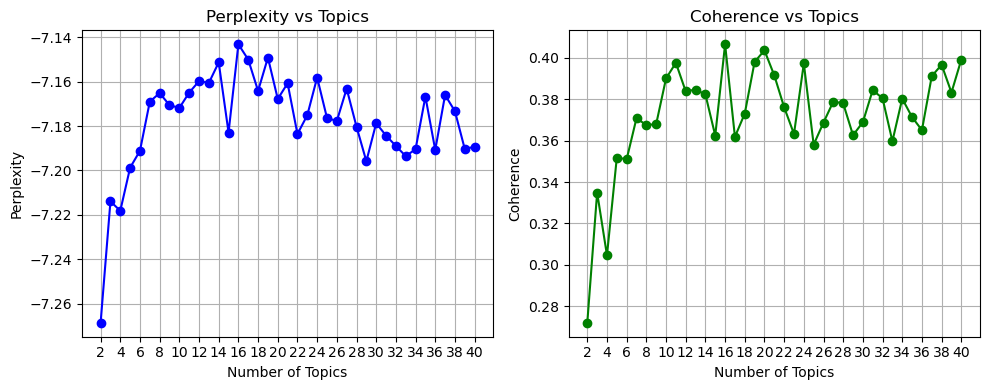

   Topics  Perplexity  Coherence
0       2   -7.268489   0.272009
1       3   -7.213887   0.334965
2       4   -7.218129   0.304594
3       5   -7.198724   0.351886
4       6   -7.191140   0.351037
5       7   -7.169032   0.370905
6       8   -7.165198   0.367555
7       9   -7.170603   0.368048
8      10   -7.171883   0.390105
9      11   -7.164978   0.397647
10     12   -7.159830   0.383874
11     13   -7.160613   0.384691
12     14   -7.151390   0.382410
13     15   -7.182929   0.362486
14     16   -7.143237   0.406625
15     17   -7.150135   0.361880
16     18   -7.164226   0.373128
17     19   -7.149232   0.398113
18     20   -7.167837   0.403663
19     21   -7.160771   0.391577
20     22   -7.183593   0.376188
21     23   -7.175145   0.363278
22     24   -7.158198   0.397347
23     25   -7.176351   0.358112
24     26   -7.177760   0.368788
25     27   -7.163195   0.378952
26     28   -7.180292   0.378040
27     29   -7.195839   0.362661
28     30   -7.178747   0.368987
29     31 

In [13]:
# Combine handling NaN values and adding custom stopwords in one go
df['Abstract'] = df['Abstract'].fillna('').astype(str)  # Handle NaN values
stop_words = set(stopwords.words('english')).union(custom_stopwords)  # Add 'english' and custom stopwords

# Preprocess Abstract text and add the extracted nouns to a new 'nouns' column
df['nouns'] = df['Abstract'].apply(lambda x: preprocess_text(x, stop_words))

# Create Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(df['nouns'])
corpus = [dictionary.doc2bow(nouns) for nouns in df['nouns'] if nouns]  # Ensure non-empty nouns

# Specify start and end values for number of topics
start = 2
end = 40

# Evaluate LDA model for the specified range of topics
results_df = evaluate_lda(corpus, dictionary, df, start, end)

# Plot results
plt.figure(figsize=(10, 4))

# Plot for Perplexity
plt.subplot(1, 2, 1)
plt.plot(results_df['Topics'], results_df['Perplexity'], marker='o', color='blue')
plt.title('Perplexity vs Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.xticks(np.arange(start, end + 1, 2))  # Represent as integers
plt.grid()

# Plot for Coherence
plt.subplot(1, 2, 2)
plt.plot(results_df['Topics'], results_df['Coherence'], marker='o', color='green')
plt.title('Coherence vs Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(np.arange(start, end + 1, 2))  # Represent as integers
plt.grid()

plt.tight_layout()
plt.show()

print(results_df)

5.2. Topic modeling using LDA

In [14]:
# Define number of topics
num_topics = 20

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=27)

# Print the LDA model topics
topics = lda_model.print_topics(num_words=15)
for topic in topics:
    print(topic)

(0, '0.029*"compression" + 0.023*"modulus" + 0.022*"moe" + 0.017*"property" + 0.016*"strength" + 0.016*"lamina" + 0.014*"test" + 0.014*"specie" + 0.013*"mor" + 0.011*"value" + 0.011*"elasticity" + 0.010*"ratio" + 0.010*"specimen" + 0.010*"method" + 0.009*"stress"')
(1, '0.045*"acid" + 0.035*"lignin" + 0.019*"water" + 0.016*"compound" + 0.014*"content" + 0.011*"stage" + 0.011*"product" + 0.010*"reaction" + 0.010*"treatment" + 0.009*"log" + 0.008*"amount" + 0.008*"analysis" + 0.008*"method" + 0.007*"residue" + 0.007*"alcohol"')
(2, '0.032*"lignin" + 0.022*"compound" + 0.017*"reaction" + 0.017*"treatment" + 0.016*"product" + 0.015*"yield" + 0.014*"cellulose" + 0.013*"medium" + 0.011*"group" + 0.010*"production" + 0.010*"condition" + 0.009*"acid" + 0.008*"pyrolysis" + 0.008*"model" + 0.008*"weight"')
(3, '0.037*"treatment" + 0.026*"temperature" + 0.016*"change" + 0.015*"sample" + 0.015*"surface" + 0.012*"heat" + 0.012*"color" + 0.011*"charcoal" + 0.010*"solution" + 0.009*"deformation" + 0.

5.3. LDA Visualization

In [15]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the data for pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

5.4. Topic Trend Analysis

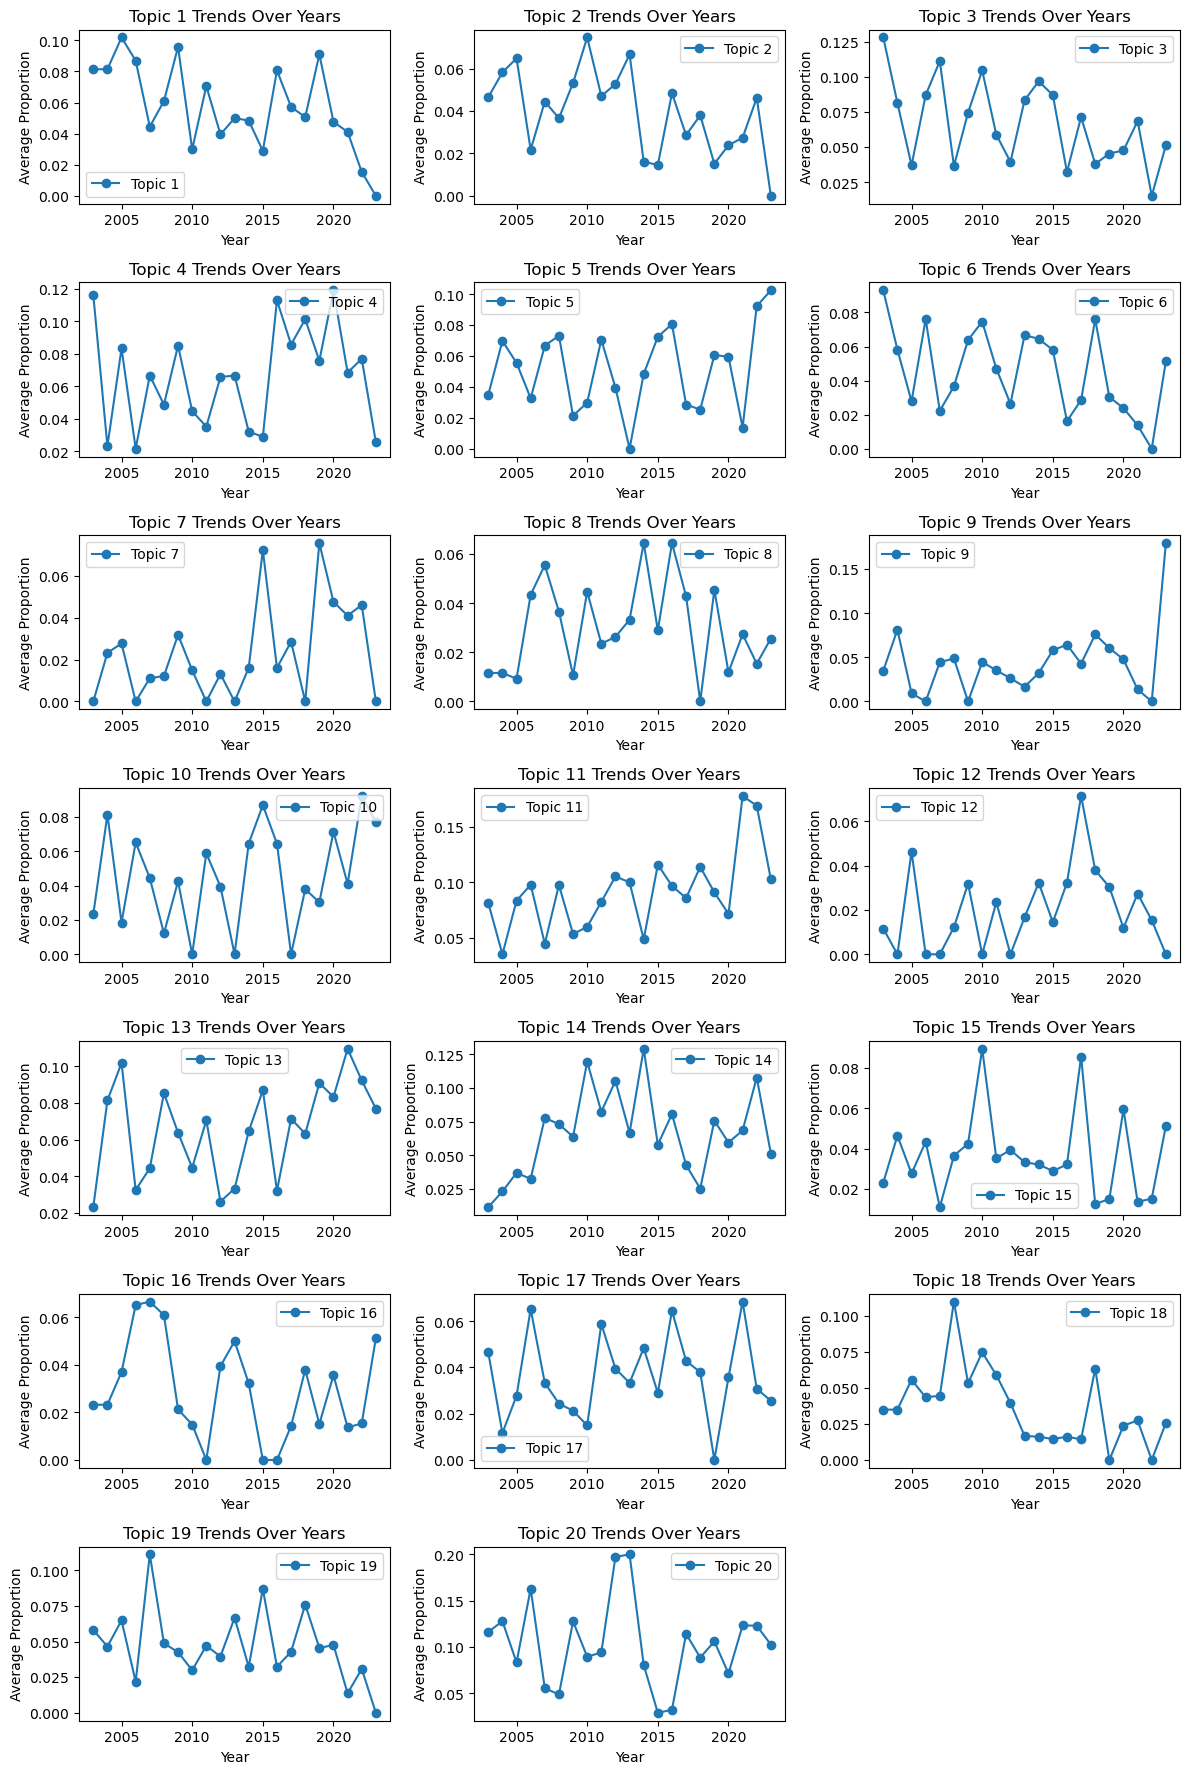

In [16]:
# Assign the most probable topic to each abstract based on the LDA model
df['Topic'] = df['nouns'].apply(lambda x: max(lda_model[dictionary.doc2bow(x)], key=lambda item: item[1])[0])

# Calculate the average proportion of each topic by year
topic_means = df.groupby(['Year', 'Topic']).size().unstack(fill_value=0)  # Fill missing values with 0
topic_means = topic_means.div(topic_means.sum(axis=1), axis=0)  # Normalize each row

# Plot the trends of each topic over the years
plt.figure(figsize=(12, 25))
for i, topic in enumerate(topic_means.columns, start=1):
    plt.subplot(10, 3, i)
    plt.plot(topic_means.index, topic_means[topic], marker='o', label=f'Topic {topic + 1}')
    plt.title(f'Topic {topic + 1} Trends Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Proportion')
    plt.legend()

plt.tight_layout()
plt.show()

# Save the topic modeling results to a CSV file
# topic_means.to_csv('topic_trends.csv', index=True)